In [3]:
! in2csv data/CA2.xls > data/CA2.csv

In [7]:
ca2DF = (sqlContext.read.format("com.databricks.spark.csv")
         .option("header", True)
         .option("inferSchema", True)
         .load("data/CA2.csv")).withColumnRenamed("X", "x").withColumnRenamed("klasteris", "cluster")
ca2DF

In [10]:
%matplotlib inline
import ggplot as gg

/home/vagrant/.miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


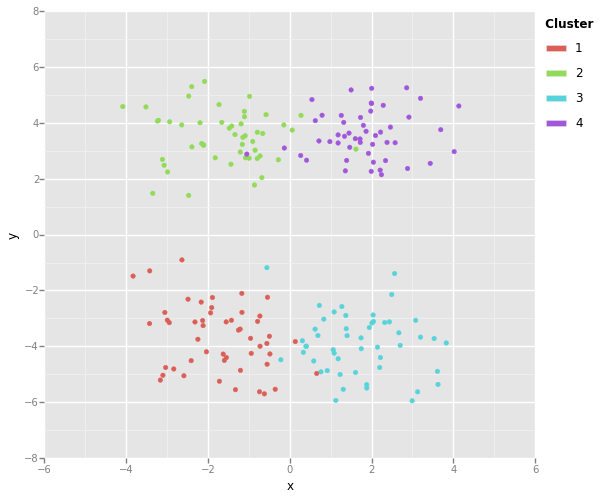

<ggplot: (-897111002)>

In [11]:
gg.ggplot(gg.aes(x="x", y="y", color="cluster"), data=ca2DF.toPandas()) + gg.geom_point()

In [15]:
from pyspark.mllib.clustering import GaussianMixture
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.pipeline import Pipeline

In [19]:
vecAssembler = VectorAssembler(inputCols=["x", "y"], outputCol="features")
featurizationPipe = Pipeline(stages=[vecAssembler]).fit(ca2DF)

In [22]:
featurizedDF = featurizationPipe.transform(ca2DF)
featurizedDF

DataFrame[id: int, x: double, y: double, cluster: int, features: vector]

In [25]:
featuresRDD = featurizedDF.rdd.map(lambda r: r.features)
featuresRDD.take(10)

[DenseVector([-0.5431, -2.2459]),
 DenseVector([-3.0514, -2.7902]),
 DenseVector([-2.6341, -0.9064]),
 DenseVector([-2.9437, -3.1567]),
 DenseVector([-1.5985, -4.5079]),
 DenseVector([-2.4091, -4.5177]),
 DenseVector([-1.7188, -5.2553]),
 DenseVector([-1.1705, -2.1069]),
 DenseVector([-0.5582, -3.9015]),
 DenseVector([-0.9568, -3.7171])]

In [57]:
k = 2
gmmModel = GaussianMixture.train(featuresRDD, k=2)
gmmModel.gaussians

[MultivariateGaussian(mu=DenseVector([-0.0022, -3.8033]), sigma=DenseMatrix(2, 2, [3.9488, -0.456, -0.456, 1.2735], 0)),
 MultivariateGaussian(mu=DenseVector([0.1119, 3.5384]), sigma=DenseMatrix(2, 2, [4.015, 0.0834, 0.0834, 0.7807], 0))]

`MultivariateGaussian` klasės realizacija yra [čia](MultivariateGaussian)

In [55]:
from scipy.stats import multivariate_normal

**Užduotis**

- Realizuoti Gauso mišinio tankio funkciją.
- Realizuoti Akaike informacinį kriterijų (AIC) GMM modeliui.
- Realizuoti Bajeso informacinį kriterijų (BIC) GMM modeliui.
- Pagal AIC ir/arba AIC parinkti optimalų klasterių skaičių $K$ GMM modeliui.